In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

# read the site into soup object
soup_obj = soup(browser.html, 'html.parser')

browser.quit() #quit the browser since we've read it into a soup object

In [3]:
soup_obj

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [4]:
the_table = soup_obj.find("table", class_="table")
the_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [5]:
# the first table row tag (<tr>) contains the header information (and has no class attribute), so we strip that out 
# to use as our headers
#.stripped_strings returns an iterator and lists all the contents of the tag it's called out with the '\n' stripped
#since it's an iterator, we iterate over it and store that into a list with list comprehension
table_header = [header for header in the_table.find("tr").stripped_strings]
table_header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [6]:
#create what will be the list of dictionaries of data
data_list = []

# each data row has the class "data-row", so we utilize that
# find_all returns a list of all tags with class "data-row", so we loop through it
for y in the_table.find_all(class_="data-row"): #, limit=3): #used for debugging to limit results

    #.stripped_strings returns an iterator and lists all the contents of the tag it's called out with the '\n' stripped
    #since it's an iterator, we iterate over it and store that into a temporary list with list comprehension
    
    temp = [x for x in y.stripped_strings]
    #print(test) #for debugging. not recommended to do on a full list

    # store the data values in a dictionary. keys are the items of the table_header list above
    # values are the data values extracted in this for loop that were stored in temp
    # append each dictionary to the data_list
    data_list.append({
        table_header[0] : temp[0],
        table_header[1] : temp[1],
        table_header[2] : temp[2],
        table_header[3] : temp[3],
        table_header[4] : temp[4],
        table_header[5] : temp[5],
        table_header[6] : temp[6]
    })

# create the dataframe. with how we stored the data as a list of dictionaries, that's our only argument into pd.DataFrame()
mars_temps_df = pd.DataFrame(data_list)
mars_temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
mars_temps_df = mars_temps_df.astype({"id":int, "sol":int, "ls":int,\
                                     "month":int, "min_temp":float, "pressure":float})
mars_temps_df["terrestrial_date"] = pd.to_datetime(mars_temps_df["terrestrial_date"])
mars_temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [8]:
mars_temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# 6. Answer the following question: How many months exist on Mars?
max_month = mars_temps_df['month'].max()
print(f"There are {max_month} months on mars")

There are 12 months on mars


In [10]:
# 7. Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

# in theory, there are two ways to get this. the length of the dataframe,
# and arithmetic on the sol days: mars_temps_df["sol"].max() - mars_temps_df["sol"].min() + 1
# however, the arithmetic gives 1968, which is greater than the number of rows.
# indeed, the following code prints out the sol days skipped:
#for i in range(1, len(mars_temps_df)-2):
#    if (mars_temps_df.iloc[i+1, 2] - mars_temps_df.iloc[i, 2]) != 1:
#        print(f"jumps from sol {mars_temps_df.iloc[i, 2]} to sol {mars_temps_df.iloc[i+1, 2]}")
#
# there are a lot of skips, so we have to try relying on the length of the dataframe.
# however, that raises the question if there are repeat sol days. let's test it with the following code:
#for i in range(1, len(mars_temps_df)-2):
#    if (mars_temps_df.iloc[i+1, 2] - mars_temps_df.iloc[i, 2]) == 0:
#        print("repeat sol day!")
#
# there is no output so each row is a unique sol day. therefore,
print(f"There are {len(mars_temps_df)} sol days recorded.")

There are 1867 sol days recorded.


As seen from the graph, the average coldest month is the 3rd month at -83.31 degrees* 
(though the 4th month at -82.75 degrees is close).
(*Dataset does not indicate unit, though Celsius is inferred)

Also from the graph, the warmest month -- interpreted as the highest average minimum temperature -- is 
the 8th month at -68.38 degrees (closely followed by the 9th month at-69.17 degrees).


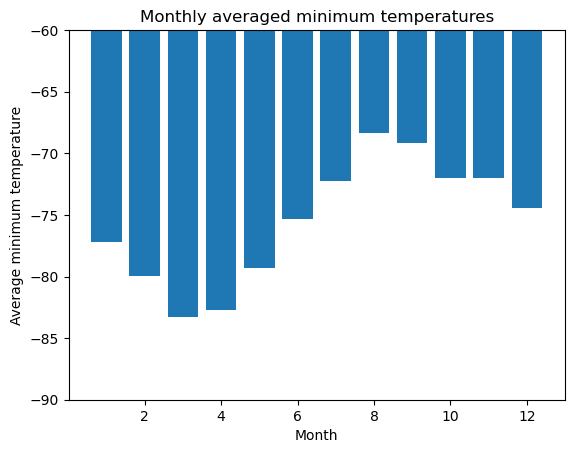

In [11]:
# 8. Answer the following question: What are the coldest and the warmest months on Mars
# (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature
# of all the months. Plot the results as a bar chart.

monthly_temp_averages = []

for i in range(1,13):
    monthly_temp_averages.append(mars_temps_df.loc[mars_temps_df["month"]==i,"min_temp"].mean())

#monthly_averages #print for debugging

plt.bar(range(1,13), monthly_temp_averages)
plt.ylabel("Average minimum temperature")
plt.ylim(-90,-60)
plt.xlabel("Month")
plt.title("Monthly averaged minimum temperatures")

print(f"As seen from the graph, the average coldest month is the 3rd month at {monthly_temp_averages[2]:.2f} degrees* \
\n(though the 4th month at {monthly_temp_averages[3]:.2f} degrees is close).\
\n(*Dataset does not indicate unit, though Celsius is inferred)")
print("")
print(f"Also from the graph, the warmest month -- interpreted as the highest average minimum temperature -- is \
\nthe 8th month at {monthly_temp_averages[7]:.2f} degrees (closely followed by the 9th month at\
{monthly_temp_averages[8]:.2f} degrees).")

From the graph, the month with the lowest average pressure is the 6th month at 745.05 Pascal*,
with the 5th month at 748.56 Pascal being a close second.
(*Dataset does not indicate unit, though Pascal is inferred)

The month with the highest average pressure is the 9th month at 913.31 Pascal*,
with the 2nd month at 889.46 Pascal being next highest.


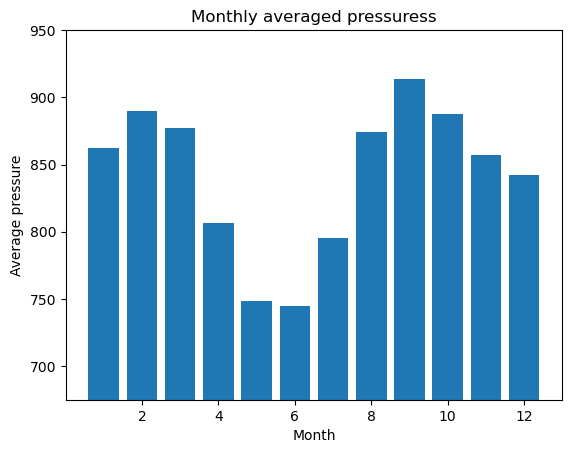

In [12]:
# 9. Answer the following question: Which months have the lowest and the highest
# atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric
#pressure of all the months. Plot the results as a bar chart.

monthly_pressure_averages = []

for i in range(1,13):
    monthly_pressure_averages.append(mars_temps_df.loc[mars_temps_df["month"]==i,"pressure"].mean())

#monthly_pressure_averages #print for debugging

plt.bar(range(1,13), monthly_pressure_averages)
plt.ylabel("Average pressure")
plt.ylim(675,950)
plt.xlabel("Month")
plt.title("Monthly averaged pressuress")

print(f"From the graph, the month with the lowest average pressure is the 6th month \
at {monthly_pressure_averages[5]:.2f} Pascal*,\n\
with the 5th month at {monthly_pressure_averages[4]:.2f} Pascal being a close second.\
\n(*Dataset does not indicate unit, though Pascal is inferred)")
print("")
print(f"The month with the highest average pressure is the 9th month \
at {monthly_pressure_averages[8]:.2f} Pascal*,\n\
with the 2nd month at {monthly_pressure_averages[1]:.2f} Pascal being next highest.")

There are 3 local maxima and 3 local minima that we can see emerge as trends in the graph. Zooming in,
we find that the maxima occur around 2013-01-03, 2014-11-01, and 2016-10-03 and the minima occur around
2014-02-06, 2015-12-09, and 2017-10-10.
These date intervals are approximately 22, 23, 22 and 22 months apart, respectively. So, we suggest 
one Martian year is about 22.25 Earth months, or 670 days (using 30.4 average days/month).
Looking up the information, we see that one Martian year is 687 Earth days, meaning our estimate was off by ~2.5%.


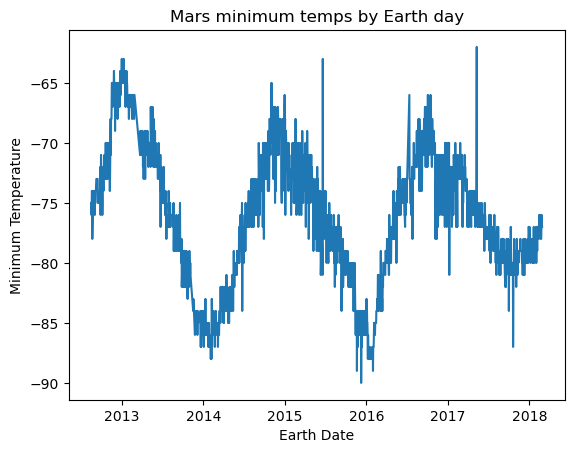

In [13]:
# 10. Answer the following question: About how many terrestrial (Earth) days
# exist in a Martian year? That is, in the time that Mars circles the Sun once,
# how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

# use the following magic commands to switch between image display methods
# use 'notebook' for zooming in
#%matplotlib notebook
# use 'inline' for normal viewing
%matplotlib inline

plt.plot(mars_temps_df["terrestrial_date"], mars_temps_df["min_temp"])
plt.xlabel("Earth Date")
plt.ylabel("Minimum Temperature")
plt.title("Mars minimum temps by Earth day")

# maxs = ["2013-01-03", "2014-11-01", "2016-10-03"]
# mins = ["2014-02-06", "2015-12-09", "2017-10-10"]

print("There are 3 local maxima and 3 local minima that we can see emerge as trends in the graph. Zooming in,\n\
we find that the maxima occur around 2013-01-03, 2014-11-01, and 2016-10-03 and the minima occur around\n\
2014-02-06, 2015-12-09, and 2017-10-10.\n\
These date intervals are approximately 22, 23, 22 and 22 months apart, respectively. So, we suggest \n\
one Martian year is about 22.25 Earth months, or 670 days (using 30.4 average days/month).\n\
Looking up the information, we see that one Martian year is 687 Earth days, meaning our estimate was off by ~2.5%.")
# 



In [14]:
# 11. Export the DataFrame to a CSV file.

mars_temps_df.to_csv("mars_temps.csv", index=False)